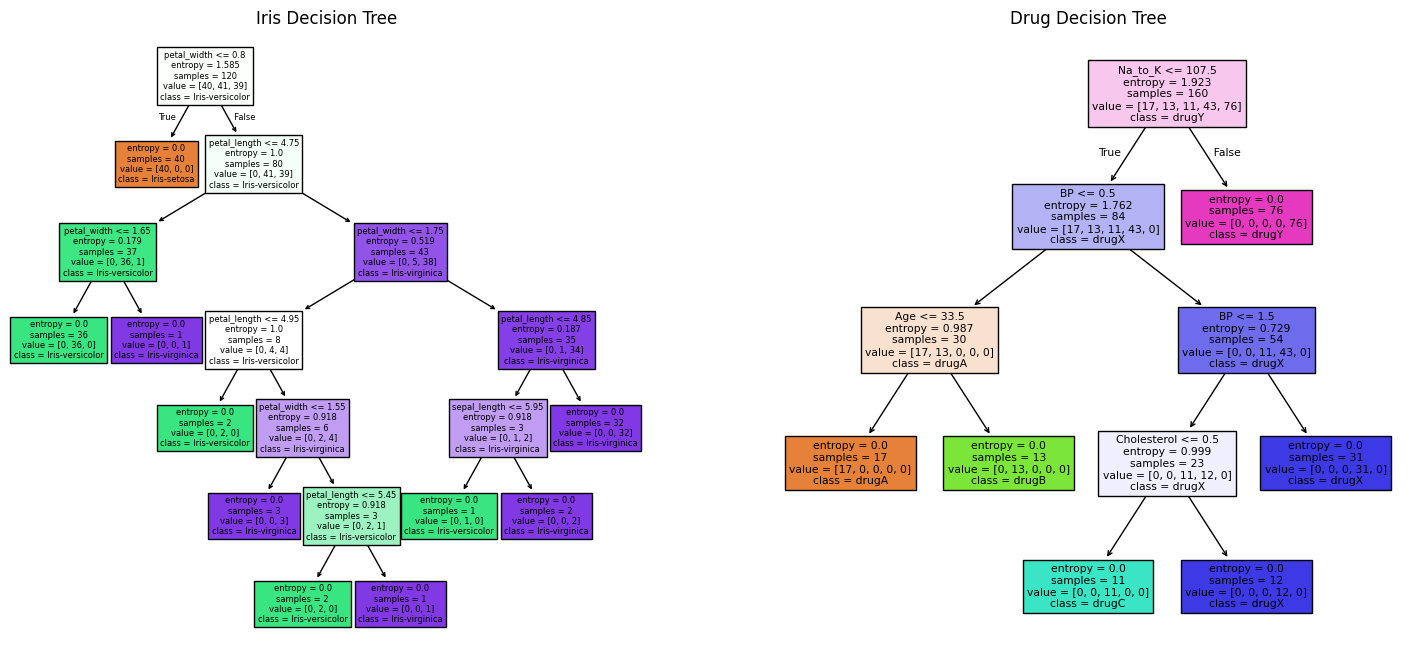


### IRIS Dataset ###
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


### Drug Dataset ###
Accuracy: 1.00
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the datasets
iris_df = pd.read_csv('/content/iris.csv')
drug_df = pd.read_csv('/content/drug.csv')

# ------------------------------
# 1. Decision Tree Classifier for IRIS dataset
# ------------------------------
# Splitting data into features and target
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

# Splitting into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
iris_clf = DecisionTreeClassifier(criterion='entropy')
iris_clf.fit(X_train_iris, y_train_iris)

# Making predictions
y_pred_iris = iris_clf.predict(X_test_iris)

# Evaluation metrics
iris_accuracy = accuracy_score(y_test_iris, y_pred_iris)
iris_confusion = confusion_matrix(y_test_iris, y_pred_iris)
iris_report = classification_report(y_test_iris, y_pred_iris)

# ------------------------------
# 2. Decision Tree Classifier for Drug dataset
# ------------------------------
# Encode all categorical columns
label_encoders = {}
drug_encoded = drug_df.copy()

for col in drug_df.columns:
    le = LabelEncoder()
    drug_encoded[col] = le.fit_transform(drug_df[col])
    label_encoders[col] = le

# Splitting into features and target
X_drug = drug_encoded.drop('Drug', axis=1)
y_drug = drug_encoded['Drug']

# Splitting into training and testing sets
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
drug_clf = DecisionTreeClassifier(criterion='entropy')
drug_clf.fit(X_train_drug, y_train_drug)

# Making predictions
y_pred_drug = drug_clf.predict(X_test_drug)

# Evaluation metrics
drug_accuracy = accuracy_score(y_test_drug, y_pred_drug)
drug_confusion = confusion_matrix(y_test_drug, y_pred_drug)
drug_report = classification_report(y_test_drug, y_pred_drug)

# ------------------------------
# Visualizing the Decision Trees
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Iris Tree
plot_tree(iris_clf, filled=True, feature_names=X_iris.columns, class_names=iris_df['species'].unique(), ax=axes[0])
axes[0].set_title('Iris Decision Tree')

# Drug Tree
plot_tree(drug_clf, filled=True, feature_names=X_drug.columns,
          class_names=[str(c) for c in label_encoders['Drug'].classes_], ax=axes[1])
axes[1].set_title('Drug Decision Tree')

plt.show()

# ------------------------------
# Display results
# ------------------------------
print("\n### IRIS Dataset ###")
print(f"Accuracy: {iris_accuracy:.2f}")
print("Confusion Matrix:\n", iris_confusion)
print("Classification Report:\n", iris_report)

print("\n### Drug Dataset ###")
print(f"Accuracy: {drug_accuracy:.2f}")
print("Confusion Matrix:\n", drug_confusion)
print("Classification Report:\n", drug_report)


In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
file_path = '/content/petrol_consumption.csv'
petrol_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nDataset preview:")
print(petrol_df.head())

# ------------------------------
# Splitting the dataset
# ------------------------------
# Assuming the last column is the target variable (petrol consumption)
X = petrol_df.drop(petrol_df.columns[-1], axis=1)
y = petrol_df[petrol_df.columns[-1]]

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Training the Regression Tree model
# ------------------------------
reg_tree = DecisionTreeRegressor(criterion='squared_error', random_state=42)
reg_tree.fit(X_train, y_train)

# Making predictions
y_pred = reg_tree.predict(X_test)

# ------------------------------
# Evaluating the model
# ------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Displaying evaluation metrics
print("\n### Evaluation Metrics ###")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ------------------------------
# Visualizing the Regression Tree
# ------------------------------
plt.figure(figsize=(200, 200))
plot_tree(reg_tree, filled=True, feature_names=X.columns, rounded=True)
plt.title("Regression Tree for Petrol Consumption")
plt.show()



Dataset preview:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

### Evaluation Metrics ###
Mean Absolute Error (MAE): 94.30
Mean Squared Error (MSE): 17347.70
Root Mean Squared Error (RMSE): 131.71
